<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Python Data Visualization for Everyone</h1>
        <h1>Pandas</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import watermark

%matplotlib inline
%load_ext watermark

We start by printing out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.12.3

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Git hash: 234b7d647acd6ea9d180b4aa60d2216547eb937a

matplotlib: 3.8.0
watermark : 2.4.3
numpy     : 1.26.4
pandas    : 2.2.3



Set the default size of all figures to 11x8 inches

In [3]:
plt.rcParams["figure.figsize"] = (11, 8)

## DataFrames and Series

Series and DataFrames can be thought of as dictionaries associating keys to lists of values

In [4]:
data = {  "id": [23,    42,      12,     86], 
        "Name": ["Bob", "Karen", "Kate", "Bill"]}

In [5]:
data

{'id': [23, 42, 12, 86], 'Name': ['Bob', 'Karen', 'Kate', 'Bill']}

A Series corresponds to just a sigle list of values

In [6]:
series = pd.Series(data["id"])

In [7]:
series

0    23
1    42
2    12
3    86
dtype: int64

While a DataFrame can have multiple series/columns

In [8]:
 df = pd.DataFrame(data)

In [9]:
df

,id,Name
0,23,Bob
1,42,Karen
2,12,Kate
3,86,Bill


Another way of looking at it, is that DataFrames are essentially groups of individual Series. Each Series can have it's own datatype **dtype**

In [10]:
df.dtypes

id       int64
Name    object
dtype: object

We can get general information about how the DataFrame is being stored by calling __info()__

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4 non-null      int64 
 1   Name    4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


Subsetting a DataFrame by column name we retrieve the underlying Series

In [12]:
type(df['id'])

pandas.core.series.Series

Both columns and index values have types and possibly names

In [13]:
df.columns

Index(['id', 'Name'], dtype='object')

In [14]:
df.index

RangeIndex(start=0, stop=4, step=1)

And we can query the shape and number of dimensions of the DataFrame easily

In [15]:
df.shape

(4, 2)

In [16]:
df.ndim

2

And relabel both index and column values

In [17]:
df.index = ["row" + str(i) for i in range(4)]
df.columns = ['ID', 'First Name']

In [18]:
df

,ID,First Name
row0,23,Bob
row1,42,Karen
row2,12,Kate
row3,86,Bill


In [19]:
df.loc['row1']

ID               42
First Name    Karen
Name: row1, dtype: object

In [20]:
df.iloc[1]

ID               42
First Name    Karen
Name: row1, dtype: object

## Importing and exporting data

### Read csv files

File can be zipped

In [21]:
green = pd.read_csv('data/green_tripdata_2014-04.csv.gz', 
        parse_dates=['lpep_pickup_datetime', 'Lpep_dropoff_datetime'], 
                    nrows=2000, index_col='VendorID', 
        dtype={'RateCodeID':'str', 'Trip_type': 'str'}
                   )

We read only 2,000 rows as expected

In [22]:
green.shape

(2000, 21)

And used the right dtypes for each column

In [23]:
green.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2 to 2
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   2000 non-null   datetime64[ns]
 1   Lpep_dropoff_datetime  2000 non-null   datetime64[ns]
 2   Store_and_fwd_flag     2000 non-null   object        
 3   RateCodeID             2000 non-null   object        
 4   Pickup_longitude       2000 non-null   float64       
 5   Pickup_latitude        2000 non-null   float64       
 6   Dropoff_longitude      2000 non-null   float64       
 7   Dropoff_latitude       2000 non-null   float64       
 8   Passenger_count        2000 non-null   int64         
 9   Trip_distance          2000 non-null   float64       
 10  Fare_amount            2000 non-null   float64       
 11  Extra                  2000 non-null   float64       
 12  MTA_tax                2000 non-null   float64       
 13  Tip_amount 

### Web pages

We're going to use the Wikipedia page with the current numbers of cases for CoVID-19

In [24]:
url = 'https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory'

All we have to do is to provide the url

In [25]:
dfs = pd.read_html(url)

Which retrieves all the tables in the page, in the order they appear

In [26]:
len(dfs)

68

So the first one is the infobox on the top right hand corner

In [27]:
dfs[0]

,COVID-19 pandemic,COVID-19 pandemic.1
0,"Confirmed deaths per 100,000 population,[1][no...","Confirmed deaths per 100,000 population,[1][no..."
1,Disease,COVID-19
2,Virus strain,SARS-CoV-2
3,Source,"Probably bats, possibly via pangolins[2][3][4]"
4,Location,Worldwide
5,First outbreak,China[5]
6,Index case,"Wuhan, Hubei, China 30°37′11″N 114°15′28″E﻿ / ..."
7,Date,First case of COVID-19: 17 November 2019 Publi...
8,Confirmed cases,"776,470,880[6]"
9,Deaths,"7,068,664[6]"


And the sixteenth one is the number of cases and deaths per country

In [28]:
dfs[15].head()

,Region[30],Total cases,Total deaths,Cases per million,Deaths per million,Current weekly cases,Current weekly deaths,Population millions,Vacci­nated %[31]
0,European Union,179537758,1185108,401363,2649,886074,3985,447,75.1
1,North America,103783777,1133607,281404,3074,476376,2975,369,76.1
2,Other Europe,57721948,498259,247054,2133,74354,248,234,61.2
3,South America,65835789,1313061,153151,3055,378622,1252,430,81.7
4,Russia and Central Asia,25646533,434988,108307,1837,49022,393,237,55.9


Due to the formatting of the table, pandas interpreted the first two rows to be the headers. We can fix this by explicitly telling it to just use the first row for the column headers

In [29]:
dfs = pd.read_html(url, header=0)

In [30]:
dfs[15]

,Region[30],Total cases,Total deaths,Cases per million,Deaths per million,Current weekly cases,Current weekly deaths,Population millions,Vacci­nated %[31]
0,European Union,179537758,1185108,401363,2649,886074,3985,447,75.1
1,North America,103783777,1133607,281404,3074,476376,2975,369,76.1
2,Other Europe,57721948,498259,247054,2133,74354,248,234,61.2
3,South America,65835789,1313061,153151,3055,378622,1252,430,81.7
4,Russia and Central Asia,25646533,434988,108307,1837,49022,393,237,55.9
5,Central America,11338600,380660,63108,2119,60268,263,180,69.0
6,Middle East,22549784,238106,86400,912,13457,65,261,51.9
7,Oceania and islands in East Asia,60806544,318455,105317,552,1390401,2777,577,72.1
8,Caribbean,2605473,26237,60179,606,737,25,43,46.4
9,South Asia,50347136,620218,27121,334,1911,24,1856,69.4


## Subsetting

The top/bottom N number of values are easy to access

In [31]:
green.head(10)

,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Unnamed: 20,
VendorID,,,,,,,,,,,,,,,,,,,,,
2,2014-04-01,2014-04-01 14:24:20,N,1,0.0,0.0,0.000000,0.000000,1,7.45,...,0.0,0.5,0.0,0.0,NaN,23.5,2,1,NaN,NaN
2,2014-04-01,2014-04-01 17:21:33,N,1,0.0,0.0,-73.987663,40.780872,1,8.95,...,1.0,0.5,0.0,0.0,NaN,32.5,2,1,NaN,NaN
2,2014-04-01,2014-04-01 15:06:18,N,1,0.0,0.0,-73.946922,40.831764,1,1.32,...,0.0,0.5,0.0,0.0,NaN,7.0,2,1,NaN,NaN
2,2014-04-01,2014-04-01 08:09:27,N,1,0.0,0.0,-73.947670,40.808651,5,0.10,...,0.0,0.5,0.0,0.0,NaN,3.5,2,1,NaN,NaN
2,2014-04-01,2014-04-01 16:15:13,N,1,0.0,0.0,0.000000,0.000000,1,7.09,...,0.0,0.5,4.7,0.0,NaN,28.7,1,1,NaN,NaN
2,2014-04-01,2014-04-01 16:31:57,N,1,0.0,0.0,-73.950539,40.786633,1,5.20,...,0.0,0.5,0.0,0.0,NaN,17.5,2,1,NaN,NaN
2,2014-04-01,2014-04-01 10:59:14,N,1,0.0,0.0,0.000000,0.000000,1,8.96,...,0.0,0.5,4.0,0.0,NaN,43.0,1,1,NaN,NaN
2,2014-04-01,2014-04-01 05:23:51,N,1,0.0,0.0,-73.885551,40.655041,5,4.73,...,0.5,0.5,0.0,0.0,NaN,17.5,2,1,NaN,NaN
2,2014-04-01,2014-04-01 16:58:33,N,1,0.0,0.0,-73.891830,40.826359,1,0.19,...,0.0,0.5,0.0,0.0,NaN,3.5,2,1,NaN,NaN


In [32]:
green.tail(2)

,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Unnamed: 20,
VendorID,,,,,,,,,,,,,,,,,,,,,
2,2014-04-01 02:35:37,2014-04-01 02:49:16,N,1,-73.937965,40.808022,-73.976608,40.748375,2,4.99,...,0.5,0.5,2.5,0.0,NaN,19.0,1,1,NaN,NaN
2,2014-04-01 02:36:00,2014-04-01 02:45:44,N,1,-73.870270,40.749130,-73.942863,40.838142,1,2.33,...,0.5,0.5,0.0,0.0,NaN,11.0,2,1,NaN,NaN


And individual rows, which can be indexed by Name

In [33]:
green.loc[2]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Unnamed: 20,
VendorID,,,,,,,,,,,,,,,,,,,,,
2,2014-04-01 00:00:00,2014-04-01 14:24:20,N,1,0.000000,0.000000,0.000000,0.000000,1,7.45,...,0.0,0.5,0.0,0.0,NaN,23.5,2,1,NaN,NaN
2,2014-04-01 00:00:00,2014-04-01 17:21:33,N,1,0.000000,0.000000,-73.987663,40.780872,1,8.95,...,1.0,0.5,0.0,0.0,NaN,32.5,2,1,NaN,NaN
2,2014-04-01 00:00:00,2014-04-01 15:06:18,N,1,0.000000,0.000000,-73.946922,40.831764,1,1.32,...,0.0,0.5,0.0,0.0,NaN,7.0,2,1,NaN,NaN
2,2014-04-01 00:00:00,2014-04-01 08:09:27,N,1,0.000000,0.000000,-73.947670,40.808651,5,0.10,...,0.0,0.5,0.0,0.0,NaN,3.5,2,1,NaN,NaN
2,2014-04-01 00:00:00,2014-04-01 16:15:13,N,1,0.000000,0.000000,0.000000,0.000000,1,7.09,...,0.0,0.5,4.7,0.0,NaN,28.7,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2014-04-01 02:35:15,2014-04-01 02:40:47,N,1,-73.927505,40.810944,-73.920647,40.830791,1,1.56,...,0.5,0.5,0.0,0.0,NaN,8.0,2,1,NaN,NaN
2,2014-04-01 02:35:22,2014-04-01 02:47:14,N,1,-73.963692,40.676941,-73.956619,40.637798,1,3.70,...,0.5,0.5,3.5,0.0,NaN,18.0,1,1,NaN,NaN
2,2014-04-01 02:35:23,2014-04-01 02:43:53,N,1,-73.925369,40.761814,-73.886261,40.749565,1,2.29,...,0.5,0.5,0.0,0.0,NaN,11.0,2,1,NaN,NaN


Or by position

In [34]:
green.iloc[1336]

lpep_pickup_datetime     2014-04-01 01:27:36
Lpep_dropoff_datetime    2014-04-01 01:31:40
Store_and_fwd_flag                         N
RateCodeID                                 1
Pickup_longitude                  -73.903275
Pickup_latitude                    40.745735
Dropoff_longitude                 -73.897652
Dropoff_latitude                   40.744522
Passenger_count                            1
Trip_distance                           0.76
Fare_amount                              5.0
Extra                                    0.5
MTA_tax                                  0.5
Tip_amount                               0.0
Tolls_amount                             0.0
Ehail_fee                                NaN
Total_amount                             6.0
Payment_type                               2
Trip_type                                  1
Unnamed: 20                              NaN
                                         NaN
Name: 2, dtype: object

Rows behave a named tuples, so you can access individual elements by position:

In [35]:
green.iloc[1336, 10]

5.0

Or by name

In [36]:
green.iloc[1336].Fare_amount

5.0

Ranges can also be used with iloc

In [37]:
green.iloc[1:4]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Unnamed: 20,
VendorID,,,,,,,,,,,,,,,,,,,,,
2,2014-04-01,2014-04-01 17:21:33,N,1,0.0,0.0,-73.987663,40.780872,1,8.95,...,1.0,0.5,0.0,0.0,NaN,32.5,2,1,NaN,NaN
2,2014-04-01,2014-04-01 15:06:18,N,1,0.0,0.0,-73.946922,40.831764,1,1.32,...,0.0,0.5,0.0,0.0,NaN,7.0,2,1,NaN,NaN
2,2014-04-01,2014-04-01 08:09:27,N,1,0.0,0.0,-73.947670,40.808651,5,0.10,...,0.0,0.5,0.0,0.0,NaN,3.5,2,1,NaN,NaN


## Time Series

Apple stock information from https://finance.yahoo.com/quote/AAPL/history

We can automatically convert the Date column using __pd.read_csv__:

In [38]:
data = pd.read_csv('data/AAPL.csv', parse_dates=['Date'])

In [39]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

If we now set the Date column to be the index, we effectively create our first Time Series

In [40]:
data.set_index('Date', inplace=True)

We see that pandas automatically generated a "DatetimeIndex" object that allos us to take advantage of the fact that we are dealing with dates

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9887 entries, 1980-12-12 to 2020-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9886 non-null   float64
 1   High       9886 non-null   float64
 2   Low        9886 non-null   float64
 3   Close      9886 non-null   float64
 4   Adj Close  9886 non-null   float64
 5   Volume     9886 non-null   float64
dtypes: float64(6)
memory usage: 540.7 KB


We can easily access parts of the date object

In [42]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0
...,...,...,...,...,...,...
2020-02-24,297.260010,304.179993,289.230011,298.179993,298.179993,55548800.0
2020-02-25,300.950012,302.529999,286.130005,288.079987,288.079987,57668400.0
2020-02-26,286.529999,297.880005,286.500000,292.649994,292.649994,49513700.0


In [43]:
data.index.month

Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       ...
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype='int32', name='Date', length=9887)

In [44]:
data.index.year

Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
       ...
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
      dtype='int32', name='Date', length=9887)

In [45]:
data.index.day

Index([12, 15, 16, 17, 18, 19, 22, 23, 24, 26,
       ...
       14, 18, 19, 20, 21, 24, 25, 26, 27, 28],
      dtype='int32', name='Date', length=9887)

And slice the DataFrame by date

In [46]:
data.loc['2010':'2010-06-10'].round(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.49,30.64,30.34,30.57,26.54,123432400.0
2010-01-05,30.66,30.80,30.46,30.63,26.58,150476200.0
2010-01-06,30.63,30.75,30.11,30.14,26.16,138040000.0
2010-01-07,30.25,30.29,29.86,30.08,26.11,119282800.0
2010-01-08,30.04,30.29,29.87,30.28,26.29,111902700.0
...,...,...,...,...,...,...
2010-06-04,36.89,37.41,36.38,36.57,31.74,189576100.0
2010-06-07,36.90,37.02,35.79,35.85,31.12,221735500.0
2010-06-08,36.18,36.26,35.09,35.62,30.92,250192600.0


As before, we note that the last value is also included

## Merge and Join

Define 2 toy DataFrames

In [47]:
A = pd.DataFrame({"lkey":  ["foo", "bar", "baz", "foo"], 
                  "value": [1,     2,     3,     4]})

B = pd.DataFrame({"rkey":  ["foo", "bar", "qux", "bar"], 
                  "value": [5,     6,     7,     8]})

Merge allows us to join them by specifying an arbitrary column on each of them

In [48]:
A.merge(B, left_on="lkey", right_on="rkey", how="left")

,lkey,value_x,rkey,value_y
0,foo,1,foo,5.0
1,bar,2,bar,6.0
2,bar,2,bar,8.0
3,baz,3,NaN,NaN
4,foo,4,foo,5.0


On the other hand, join performs the join using the respective Indices

In [49]:
A.set_index('lkey', inplace=True)
B.set_index('rkey', inplace=True)

In [50]:
A.join(B, lsuffix="_A", rsuffix="_B", how="inner")

,value_A,value_B
lkey,,
foo,1,5
bar,2,6
bar,2,8
foo,4,5


# GroupBy

In [51]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0
...,...,...,...,...,...,...
2020-02-24,297.260010,304.179993,289.230011,298.179993,298.179993,55548800.0
2020-02-25,300.950012,302.529999,286.130005,288.079987,288.079987,57668400.0
2020-02-26,286.529999,297.880005,286.500000,292.649994,292.649994,49513700.0


In [52]:
apple = data.copy()

In [53]:
apple['year'] = data.index.year
apple['month'] = data.index.month

In [54]:
apple[['Close', 'year']].groupby('year').mean()

,Close
year,
1980,0.543613
1981,0.434125
1982,0.341835
1983,0.669096
1984,0.478605
1985,0.360934
1986,0.579651
1987,1.391004
1988,1.483537


# Pivot Table

In [55]:
pd.pivot_table(apple['2010':], index='month', columns='year', values='Close', aggfunc='mean')

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
month,,,,,,,,,,,
1,29.673609,48.340000,61.225428,71.117483,76.777959,110.641501,98.428946,119.570000,174.005237,154.166190,311.916191
2,28.399398,50.168948,71.081572,65.258422,75.225714,125.432105,95.746500,133.714209,167.638947,171.727893,311.270522
3,31.915838,49.641553,82.501104,63.120143,76.173468,125.970908,104.267273,140.617826,174.496192,183.293810,NaN
4,35.878368,48.630785,86.571857,59.966428,77.296327,127.291428,106.739048,142.886842,169.834287,200.516191,NaN
5,35.923071,48.826394,80.667597,63.778961,86.170817,128.761500,94.974762,152.227726,185.536818,191.273637,NaN
6,37.306494,47.297337,82.080340,60.791143,91.885443,127.806817,96.622273,147.831362,188.621429,192.969000,NaN
7,36.421429,53.176857,85.866871,61.308182,95.625909,125.335455,98.556500,148.299499,190.311429,205.216364,NaN
8,35.903312,53.823230,91.813727,69.263376,98.436667,113.394762,107.665218,159.021306,213.346089,204.957728,NaN
9,39.121564,56.070476,97.366918,68.597786,100.548572,112.797619,110.857142,157.608500,222.073685,217.994999,NaN


## Basic plot

In [56]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0
...,...,...,...,...,...,...
2020-02-24,297.260010,304.179993,289.230011,298.179993,298.179993,55548800.0
2020-02-25,300.950012,302.529999,286.130005,288.079987,288.079987,57668400.0
2020-02-26,286.529999,297.880005,286.500000,292.649994,292.649994,49513700.0


For quick and dirty plots, you can just use **plot**. It won't be pretty, but it will get the job done.

<Axes: xlabel='Date'>

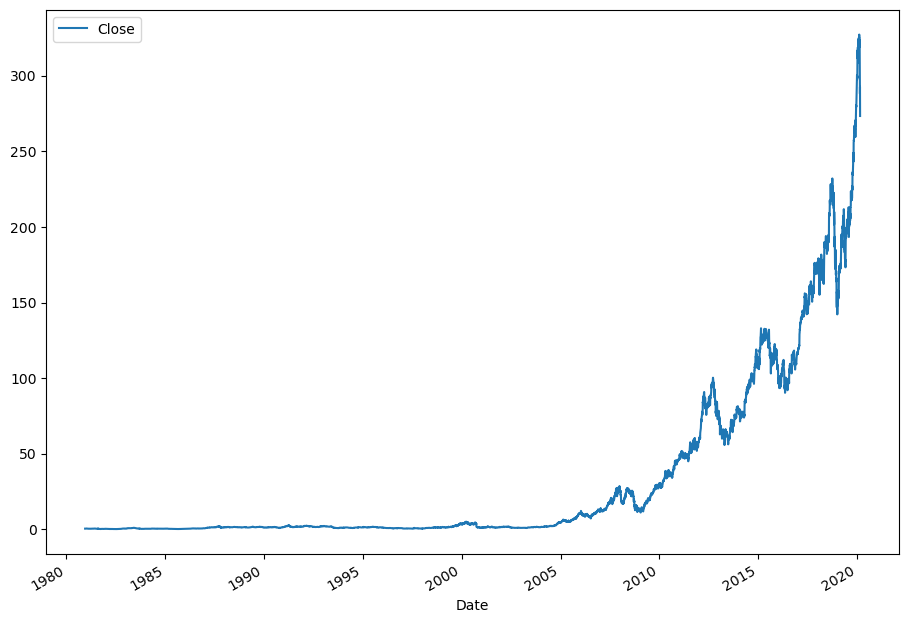

In [57]:
data.plot(y='Close')

Naturally, we can also choose the color of the line to use:

<Axes: xlabel='Date'>

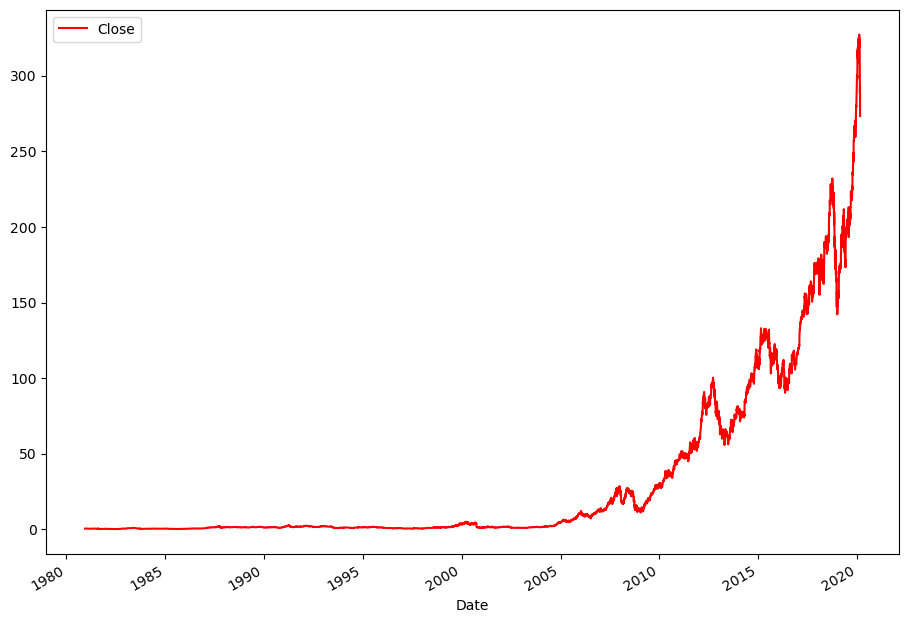

In [58]:
data.plot(y='Close', color='red')

Easily add a legend

Text(0.5, 0, 'Date')

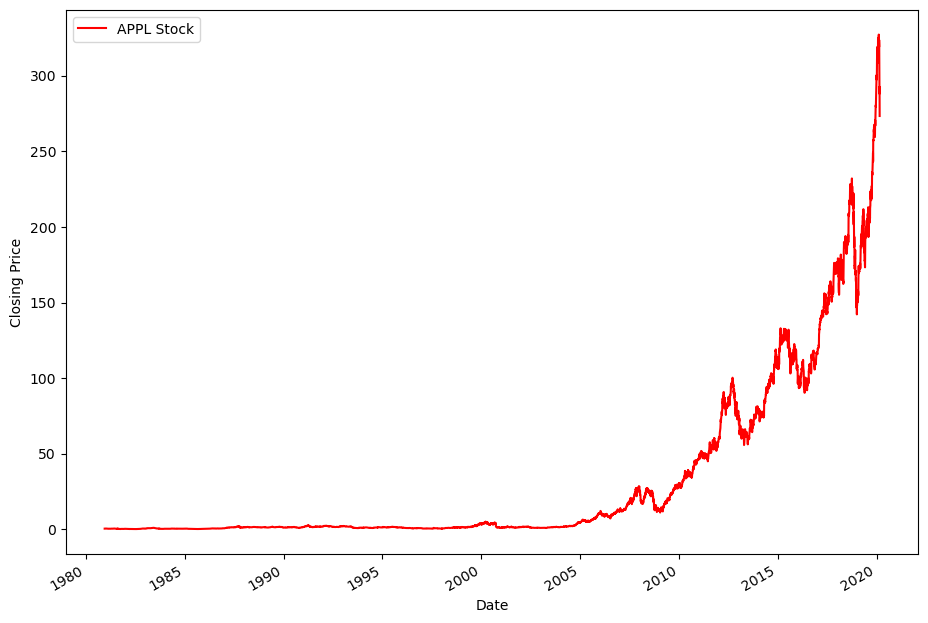

In [59]:
ax = data.plot(y='Close', color='red', label='APPL Stock')
ax.set_ylabel('Closing Price')
ax.set_xlabel('Date')

## Scatter plot

Let's do something slightly more serious. We start by loading some data from a csv file using **pandas**.

Marriage age data from: https://www.statcrunch.com/5.0/viewreport.php?reportid=41662

In [60]:
ages = pd.read_csv('data/ages.csv')

Let's take a quick look at the data to make sure it is correct.

In [61]:
ages.head()

,Wife,Husband
0,43,49
1,28,25
2,30,40
3,57,52
4,52,58


In [62]:
ages.shape

(170, 2)

Naturally, we could also have used the pandas internal plotting functionality. Indeed, pandas, like many other plotting libraries just use matplotlib in the background so you can do things like:

<Axes: xlabel='Wife', ylabel='Husband'>

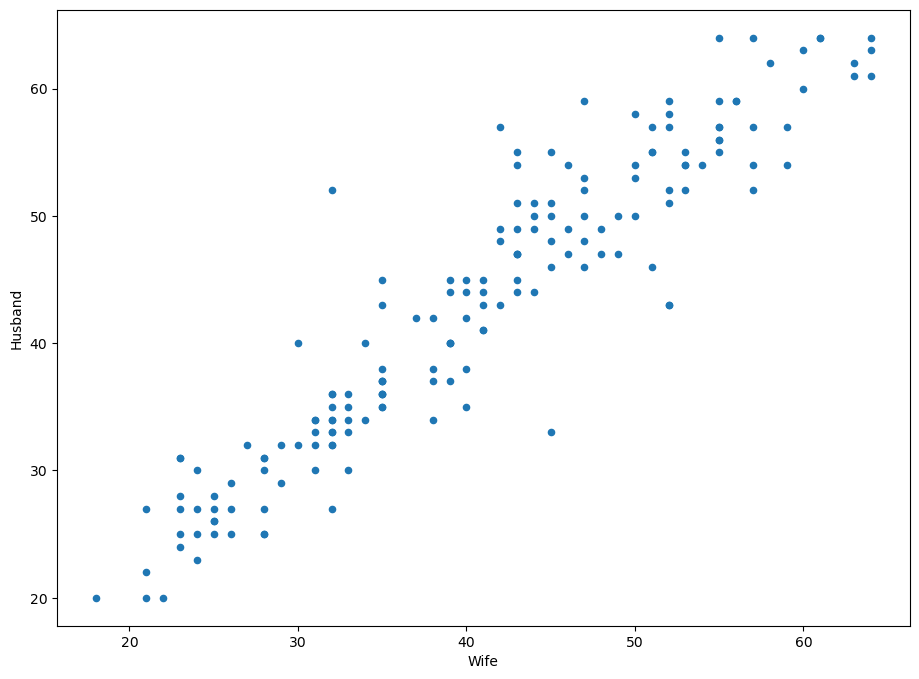

In [63]:
ages.plot(x='Wife', y='Husband', kind='scatter')

## Bar plot

**pandas** supports several basic types of plots out of the box. To illustrate the bar plot we will use some made up data:

In [64]:
dataLA = [20, 14, 23]
dataSF = [11, 18, 28]

bars = pd.DataFrame({'LA': dataLA, 'SF': dataSF})

In [65]:
bars

,LA,SF
0,20,11
1,14,18
2,23,28


Here we have two different datasets with 3 data points (classes) each. 

<Axes: >

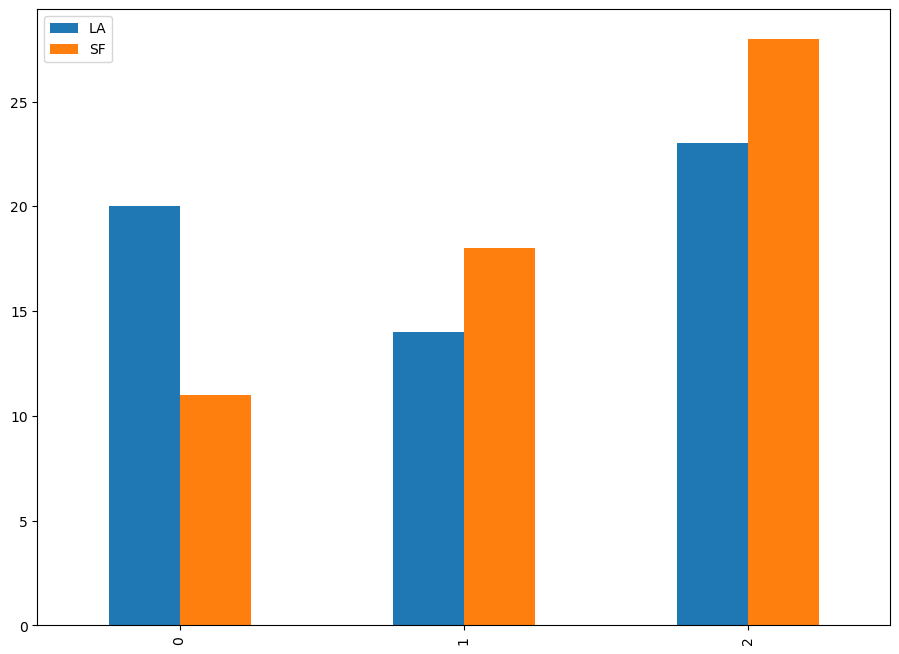

In [66]:
bars.plot(kind='bar')

## Pie plot

Pie plots are **EVIL**! But just in case you are too... Here we use the **figsize** parameter to **plt.figure** to set the figure size in inches. Notice that this is slightly different than what we did above.

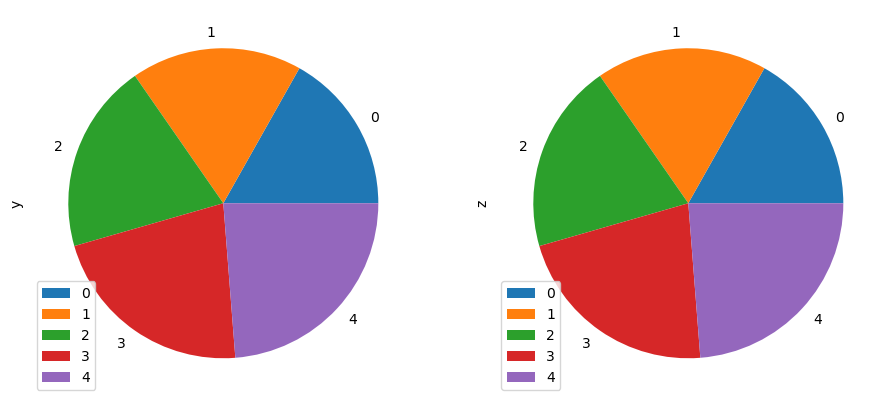

In [67]:
data = pd.DataFrame({'y': [17, 18, 20, 22, 24], 'z': [17, 18, 20, 22, 24]})

ax_lst = data.plot(kind='pie', subplots=True)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>